# readme
分析資料種包含的各種形態瑕疵

In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
from utils import xgb_model, get_data, lr_curve, eva_metric, xgb_grid_test, svm_grid_test
from noising import sig_disturb, sig_transmittion_noise, sig_drop, plt_drop

In [3]:
save_path = '02-signal_testing'
package_path = 'water_MLOps'

import os
cwd = os.getcwd().split("/")[-1]
if cwd == package_path:
    print(cwd)
    if not os.path.isdir(save_path):
#         print('create '+save_path)
        os.mkdir(save_path)
    
if cwd == save_path:
    print('ok')
    pass
else:
    os.chdir(save_path)
os.getcwd()

water_MLOps


'/home/jovyan/git/water_MLOps/02-signal_testing'

# EDA

In [4]:
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')
print(label.head())
df.head()

0    70.0
1    70.0
2    70.0
3    71.0
4    71.0
Name: dirt, dtype: float64


,C,D,time
0,17.000000,118.000000,0
1,114.680482,171.433735,1
2,287.000000,208.000000,2
3,17.000000,118.000000,3
4,123.428571,184.785714,4


## 待處理

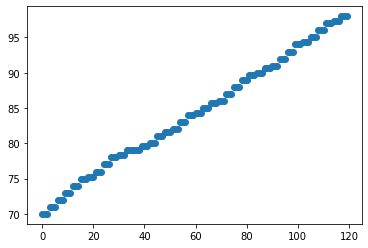

In [5]:
# 資料可能是連續的 要調整
x_axis = np.array(range(len(label)))
plt.scatter(x_axis, label, marker='o')

## Naive-model training

In [6]:
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')

# test on xgb
record_dic = xgb_grid_test(df, label)
# test on svm
svm_lis = svm_grid_test(df, label)

# record svm into dic
record_dic['svr_rbf'] = [np.nan]*len(record_dic['score'])
record_dic['svr_rbf'] =  svm_lis[0]+[np.nan]*(len(record_dic['score'])-len(svm_lis[0]))
record_dic['svr_linear'] = [np.nan]*len(record_dic['score'])
record_dic['svr_linear'] = svm_lis[1]+[np.nan]*(len(record_dic['score'])-len(svm_lis[1]))

# save to csv
record = pd.DataFrame(record_dic)
record.to_csv('./naive_training.csv')
record

reg:squarederror gblinear max_depth = 4
reg:squarederror gblinear max_depth = 8
reg:squarederror gblinear max_depth = 12
reg:squarederror gbtree max_depth = 4
reg:squarederror gbtree max_depth = 8
reg:squarederror gbtree max_depth = 12
reg:squarederror dart max_depth = 4
reg:squarederror dart max_depth = 8
reg:squarederror dart max_depth = 12
reg:linear gblinear max_depth = 4
[17:24:51] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
reg:linear gblinear max_depth = 8
[17:24:51] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
reg:linear gblinear max_depth = 12
[17:24:51] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
reg:linear gbtree max_depth = 4
[17:24:51] WARNING: /opt/con

,obj,booster,max_depth,score,svr_rbf,svr_linear
0,reg:squarederror,gblinear,4,0.821026,svr_rbf,svr_lin
1,reg:squarederror,gblinear,8,0.821026,0.234016,0.990287
2,reg:squarederror,gblinear,12,0.821026,NaN,NaN
3,reg:squarederror,gbtree,4,0.994680,NaN,NaN
4,reg:squarederror,gbtree,8,0.994514,NaN,NaN
5,reg:squarederror,gbtree,12,0.994526,NaN,NaN
6,reg:squarederror,dart,4,0.994681,NaN,NaN
7,reg:squarederror,dart,8,0.994538,NaN,NaN
8,reg:squarederror,dart,12,0.994526,NaN,NaN
9,reg:linear,gblinear,4,0.821026,NaN,NaN


## Sensor sensitivity disturb 

8.017064433372823
8.123171899843314


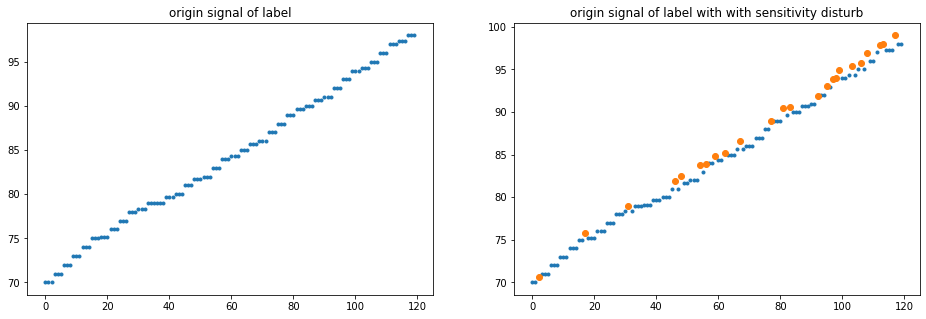

In [7]:
# 雜訊
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')
# add noise on dirt 

print(label.std())
x_axis = np.array(range(len(label)))


# add noise
noise_label, rand= sig_disturb(label, 20)
print(noise_label.std())

# plot
fig=plt.figure(figsize = (16, 5))

fig_place = [1,2]

subplot1 = fig.add_subplot(fig_place[0], fig_place[1], 1)
plt.scatter(x_axis, label, marker='.')
plt.title("origin signal of label", y=1)

subplot2 = fig.add_subplot(fig_place[0], fig_place[1], 2)
plt.title("origin signal of label with with sensitivity disturb")
plt.scatter(x_axis, noise_label, marker='.')
plt.scatter(x_axis[rand], noise_label[rand], marker='o')

In [ ]:
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')
noise_label, rand= sig_disturb(label, 20)

# sig. disturb 
label = noise_label

# test on xgb
record_dic = xgb_grid_test(df, label)
# test on svm
svm_lis = svm_grid_test(df, label)

# record svm into dic
record_dic['svr_rbf'] = [np.nan]*len(record_dic['score'])
record_dic['svr_rbf'] =  svm_lis[0]+[np.nan]*(len(record_dic['score'])-len(svm_lis[0]))
record_dic['svr_linear'] = [np.nan]*len(record_dic['score'])
record_dic['svr_linear'] = svm_lis[1]+[np.nan]*(len(record_dic['score'])-len(svm_lis[1]))

# save to csv
record = pd.DataFrame(record_dic)
record.to_csv('./disturb_training.csv')
record

reg:squarederror gblinear max_depth = 4
reg:squarederror gblinear max_depth = 8
reg:squarederror gblinear max_depth = 12
reg:squarederror gbtree max_depth = 4
reg:squarederror gbtree max_depth = 8
reg:squarederror gbtree max_depth = 12
reg:squarederror dart max_depth = 4
reg:squarederror dart max_depth = 8
reg:squarederror dart max_depth = 12


## Transmission noise
突波雜訊的控制與模型訓練。突波會顯著的對模型產生影響，所以需要先行濾除。

In [ ]:
# 雜訊
df_noise, label = get_data('~/git/water_MLOps/Cost-B.xlsx')
# add noise on dirt 

print(label.std())
x_axis = np.array(range(len(label)))


# add noise
noise_label, rand= sig_transmittion_noise(label, 20)
print(noise_label.std())

# plot
fig=plt.figure(figsize = (16, 5))

fig_place = [1,2]

subplot1 = fig.add_subplot(fig_place[0], fig_place[1], 1)
plt.scatter(x_axis, label, marker='.')
plt.title("origin signal of label", y=1)

subplot2 = fig.add_subplot(fig_place[0], fig_place[1], 2)
plt.title("origin signal of label with with Transmission noise")
plt.scatter(x_axis, noise_label, marker='.')
plt.scatter(x_axis[rand], noise_label[rand], marker='.')

### Transmission noise-去除雜訊後訓練

In [ ]:
# 在訓練資料中會遇到雜訊突波 但在測試資料集上不應該有(因為那是我們的預測目標) 
# 在訓練集上filter離群值後訓練 預測就不會受離群值影響
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.33, random_state=42)

train = pd.concat([X_train, y_train], axis = 1).reset_index(drop=True)

noise_label, _= sig_transmittion_noise(train['dirt'], 30)
train.loc[_, 'dirt'] = 1000
arr = train['dirt'].values
thres = arr.mean() + arr.std()
outlier_filter = np.array(arr<thres)

X_clean = train[outlier_filter]
y_clean = X_clean.pop('dirt')

In [ ]:
df = X_clean
label = y_clean

# test on xgb
record_dic = xgb_grid_test(df, label)
# test on svm
svm_lis = svm_grid_test(df, label)

# record svm into dic
record_dic['svr_rbf'] = [np.nan]*len(record_dic['score'])
record_dic['svr_rbf'] =  svm_lis[0]+[np.nan]*(len(record_dic['score'])-len(svm_lis[0]))
record_dic['svr_linear'] = [np.nan]*len(record_dic['score'])
record_dic['svr_linear'] = svm_lis[1]+[np.nan]*(len(record_dic['score'])-len(svm_lis[1]))

# save to csv
record = pd.DataFrame(record_dic)
record.to_csv('./noise_training.csv')
record

### Transmission noise-保留雜訊訓練

In [ ]:
# 在訓練資料中會遇到雜訊突波 但在測試資料集上不應該有(因為那是我們的預測目標) 
# 在訓練集上filter離群值後訓練 預測就不會受離群值影響
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.33, random_state=42)

train = pd.concat([X_train, y_train], axis = 1).reset_index(drop=True)

noise_label, _= sig_transmittion_noise(train['dirt'], 30)
train.loc[_, 'dirt'] = 1000

y_train = train.pop('dirt')
X_train = train
# 進行測試
df = X_train
label = y_train

# test on xgb
record_dic = xgb_grid_test(df, label)
# test on svm
svm_lis = svm_grid_test(df, label)

# record svm into dic
record_dic['svr_rbf'] = [np.nan]*len(record_dic['score'])
record_dic['svr_rbf'] =  svm_lis[0]+[np.nan]*(len(record_dic['score'])-len(svm_lis[0]))
record_dic['svr_linear'] = [np.nan]*len(record_dic['score'])
record_dic['svr_linear'] = svm_lis[1]+[np.nan]*(len(record_dic['score'])-len(svm_lis[1]))

# save to csv
record = pd.DataFrame(record_dic)
record.to_csv('./noise_with_outlier_training.csv')
record

## Delay feedback
1. 選定一個欄位 隨機shift一個連續時間區域的資料

In [ ]:
# Delay feedback
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')

np.random.seed(1)
num = 1
block_width = 7
rand = np.random.choice(range(len(label)-block_width), num, replace=False)[0]
# delay = np.array(range(rand[0],rand[0]+block_width))
# label[delay]

delay_label = label.copy()
for i in range(len(delay_label)-block_width-1, rand-1, -1):
#     print(i)
    delay_label[i + block_width] = delay_label[i]
    delay_label[i] = 0

delay_label[92:]

# plot
fig=plt.figure(figsize = (16, 5))

fig_place = [1,2]

x_axis = np.array(range(len(label)))

subplot1 = fig.add_subplot(fig_place[0], fig_place[1], 1)
plt.scatter(x_axis, label, marker='.')
plt.scatter(x_axis[rand : rand + block_width], delay_label[rand : rand + block_width], marker='o', c = 'w')
plt.title("origin signal of label", y=1)

subplot2 = fig.add_subplot(fig_place[0], fig_place[1], 2)
plt.title("origin signal of label with with delay feedback")
plt.scatter(x_axis, delay_label, marker='.')
plt.scatter(x_axis[rand : rand + block_width], delay_label[rand : rand + block_width], marker='o', c = 'w')

### delay並訓練

In [ ]:
# sig. delay
label = label

# test on xgb
record_dic = xgb_grid_test(df, label)
# test on svm
svm_lis = svm_grid_test(df, label)

# record svm into dic
record_dic['svr_rbf'] = [np.nan]*len(record_dic['score'])
record_dic['svr_rbf'] =  svm_lis[0]+[np.nan]*(len(record_dic['score'])-len(svm_lis[0]))
record_dic['svr_linear'] = [np.nan]*len(record_dic['score'])
record_dic['svr_linear'] = svm_lis[1]+[np.nan]*(len(record_dic['score'])-len(svm_lis[1]))

# save to csv
record = pd.DataFrame(record_dic)
record.to_csv('./delay_training.csv')
record

## 多重丟失
1. 不同程度的丟失測試

### drop training- 丟失並訓練
丟掉10%的數據 然後訓練

In [ ]:
# 不做處理
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')

drop_label, _ = sig_drop(label, 10)

label = drop_label
print(len(label))
print(len(df))
# test on xgb
record_dic = xgb_grid_test(df, label)
# test on svm
svm_lis = svm_grid_test(df, label)

# record svm into dic
record_dic['svr_rbf'] = [np.nan]*len(record_dic['score'])
record_dic['svr_rbf'] =  svm_lis[0]+[np.nan]*(len(record_dic['score'])-len(svm_lis[0]))
record_dic['svr_linear'] = [np.nan]*len(record_dic['score'])
record_dic['svr_linear'] = svm_lis[1]+[np.nan]*(len(record_dic['score'])-len(svm_lis[1]))

# save to csv
record = pd.DataFrame(record_dic)
record.to_csv('./drop10_training.csv')
record

### drop training with solution- 丟失並搭配處理方法後訓練

In [ ]:
# drop na
df, label = get_data('~/git/water_MLOps/Cost-B.xlsx')


X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.1, random_state=42)

train = pd.concat([X_train, y_train], axis = 1).reset_index(drop=True)

drop_label, _ = sig_drop(train.loc[:, 'dirt'], 10)
train.loc[:, 'dirt'] = drop_label
print(len(train))

# train.loc[:,'dirt'] = train['dirt'].replace(to_replace=0, value = train['dirt'].mean()) 
# train.loc[:,'dirt'] = train['dirt'].replace(to_replace=0, method='ffill')
# train = train.replace(0, np.nan)
# train = train.dropna()

drop_label = train.pop('dirt')
# train

In [ ]:
label = drop_label
df = train

# test on xgb
record_dic = xgb_grid_test(df, label)
# test on svm
svm_lis = svm_grid_test(df, label)

# record svm into dic
record_dic['svr_rbf'] = [np.nan]*len(record_dic['score'])
record_dic['svr_rbf'] =  svm_lis[0]+[np.nan]*(len(record_dic['score'])-len(svm_lis[0]))
record_dic['svr_linear'] = [np.nan]*len(record_dic['score'])
record_dic['svr_linear'] = svm_lis[1]+[np.nan]*(len(record_dic['score'])-len(svm_lis[1]))

# save to csv
record = pd.DataFrame(record_dic)
record.to_csv('./drop10_training_with_ffill.csv')
record